In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# single processor validation

In [2]:
x0 = -1
xN = 1
y0 = -1
yN = 1
z0 = -1
zN = 1

nx = ny = nz = 16

nx1 = nx+2
ny1 = ny+2
nz1 = nz+2

dx = (xN-x0)/nx
dy = (yN-y0)/ny
dz = (zN-z0)/nz

x = np.zeros(nx+2)
y = np.zeros(ny+2)
z = np.zeros(nz+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
        y[i] = y0
        z[i] = z0
    elif i==nx+1:
        x[i] = xN
        y[i] = yN
        z[i] = zN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
        y[i] = y0 + dy/2 + dy*(i-1)
        z[i] = z0 + dz/2 + dz*(i-1)

In [ ]:
folder_name = "../single_processor/results"
file_name = "theta_single"
t = 0.05
X, Y, Z= np.meshgrid(x, y, z)


solution_single = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_single_k = np.array(pd.read_csv(f"{folder_name}/{file_name}_k{k}.csv", header=None))
    solution_single[:, :, k] = solution_single_k

exact_solution = np.sin(np.pi * X) * np.sin(np.pi * Y) * np.sin(np.pi * Z) * np.exp(-3*np.pi**2 * t) + np.cos(np.pi * X) * np.cos(np.pi * Y) * np.cos(np.pi*Z)
error = exact_solution - solution_single

print(np.sqrt(np.sum(error[1:-1, 1:-1, 1:-1]**2) / nx / ny / nz))

0.2871336089570725


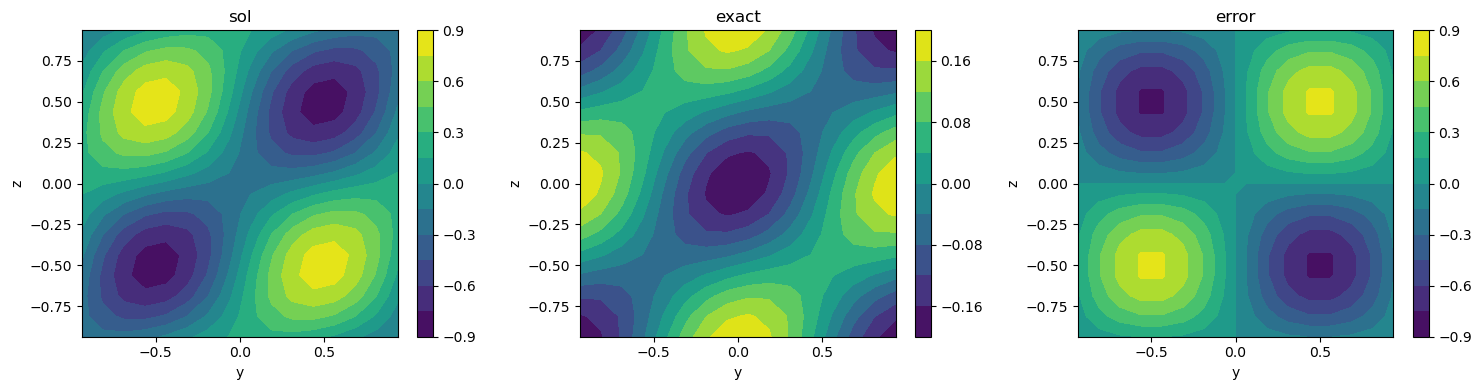

In [4]:
idx = int(nx1/4)
solution_list = [solution_single, exact_solution, error]
# solution_list = [solution_single[idx, :, :], exact_solution[idx, :, :], error[idx, :, :]]

name_list = ["sol", "exact", "error"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):

    X, Y = np.meshgrid(x, y)
    # cs = ax.contourf(X, Y, solution_list[i][:, :, idx], levels=10)
    cs = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], solution_list[i][idx, 1:-1, 1:-1], levels=10)
    # cs = ax.contourf(X, Y, solution_list[i][:, idx, :], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')
    ax.set_xlabel("y")
    ax.set_ylabel("z")

plt.tight_layout()
plt.show()

[2.20234681 2.03443153 2.01342381 2.04364352]


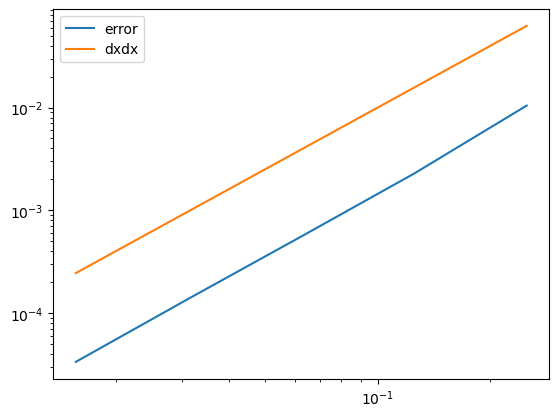

In [53]:
# Dirichlet

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.010457778400075203, 0.00227230688947751, 0.000554679443314953, 0.0001373855673154155, 3.3322924792493056e-05])
error_list = np.array([0.010457778400075203, 0.002272306889477508, 0.000554679443314953, 0.0001373855673154165, 3.3322924792491735e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[1.77584154 1.92686202 1.95317548 1.97895947]


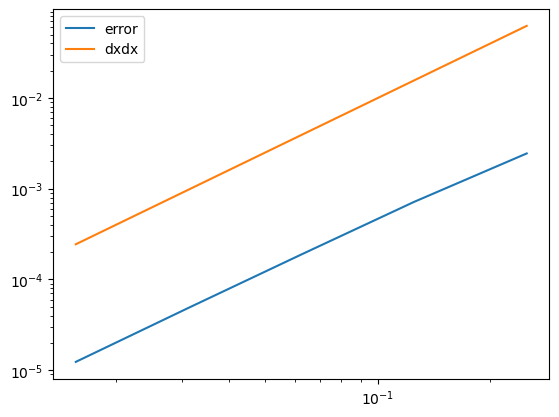

In [5]:
# periodic

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.0024497, 0.000715371, 0.000188143, 4.85874e-05, 1.23253e-05]) # dt = 0.0005, 10
# error_list = np.array([0.01331205648103189, 0.003194324421170304, 0.0007955129932501736, 0.00019877073135990742, 4.9377705032231284e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many validation

In [26]:
x0 = -1
xN = 1
y0 = -1
yN = 1
z0 = -1
zN = 1

nx = ny = nz = 8
npx = 2
npy = 1
npz = 1
mx = nx/npx
my = ny/npy
mz = nz/npz

nx1 = nx+2
ny1 = ny+2
nz1 = nz+2

dx = (xN-x0)/nx
dy = (yN-y0)/ny
dz = (zN-z0)/nz

x = np.zeros(nx+2)
y = np.zeros(ny+2)
z = np.zeros(nz+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
        y[i] = y0
        z[i] = z0
    elif i==nx+1:
        x[i] = xN
        y[i] = yN
        z[i] = zN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
        y[i] = y0 + dy/2 + dy*(i-1)
        z[i] = z0 + dz/2 + dz*(i-1)

In [30]:
folder_name_1 = "../examples_lab/results"
file_name_1 = "theta"

solution = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_k = np.array(pd.read_csv(f"{folder_name_1}/{file_name_1}_k{k}.csv", header=None))
    solution[:, :, k] = solution_k

folder_name_2 = "../single_processor/results"
file_name_2 = "theta"
exact_solution = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_single_k = np.array(pd.read_csv(f"{folder_name_2}/{file_name_2}_single_k{k}.csv", header=None))
    exact_solution[:, :, k] = solution_single_k

# t = 0.1
# X, Y, Z= np.meshgrid(x, y, z)
# exact_solution = np.sin(np.pi * X) * np.sin(np.pi * Y) * np.sin(np.pi * Z) * np.exp(-3*np.pi**2 * t) + np.cos(np.pi * X) * np.cos(np.pi * Y) * np.cos(np.pi*Z)

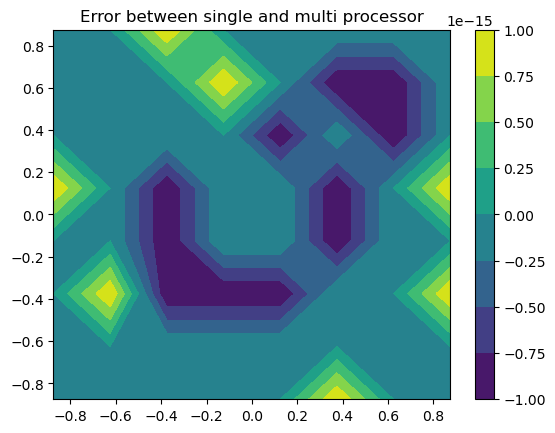

In [31]:
error = exact_solution - solution

idx = 5 # int(nz1/4)
plt.title("Error between single and multi processor")
X, Y = np.meshgrid(x[1:-1], y[1:-1])
plt.contourf(X, Y, error[1:-1, 1:-1, idx])
plt.colorbar()

7.987216665362745e-30
5.9904124990220584e-30
1.1980824998044117e-29
9.98402083170343e-30
2.1964845829747547e-29
1.297922708121446e-29
8.985618748533088e-30
9.98402083170343e-30
2.997602166487923e-16


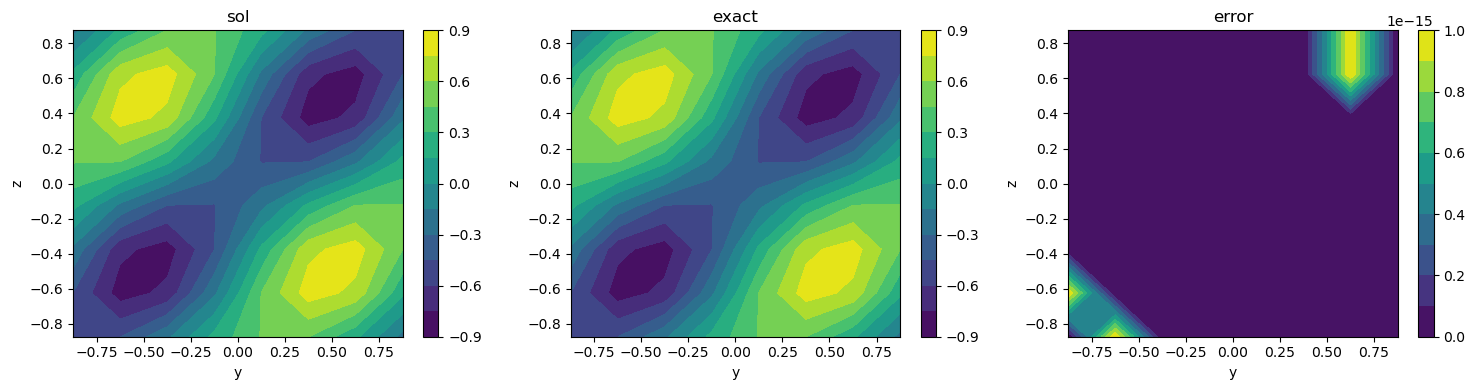

In [32]:
error = exact_solution - solution

for k in range(1, 9):
    print(np.sum(error[1:-1, k, 1:-1]**2))

print(np.sqrt(np.sum(error[1:-1, 1:-1, 1:-1]**2) / nx1 / ny1/ nz1))

idx = int(nx1/4)
solution_list = [solution, exact_solution, error]

name_list = ["sol", "exact", "error"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):

    X, Y = np.meshgrid(x[1:-1], y[1:-1])
    # cs = ax.contourf(X, Y, solution_list[i][1:-1, 1:-1, idx], levels=10)
    # cs = ax.contourf(X, Y, solution_list[i][1:-1, idx, 1:-1], levels=10)
    cs = ax.contourf(X, Y, solution_list[i][idx, 1:-1, 1:-1], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')
    ax.set_xlabel("y")
    ax.set_ylabel("z")

plt.tight_layout()
plt.show()

[2.02245927 2.01154528 1.97777328 2.02307901]


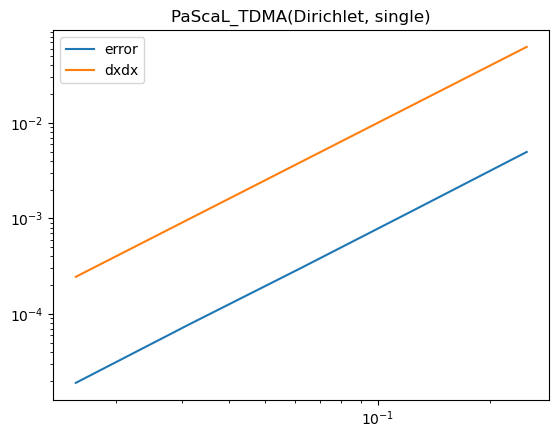

In [49]:
# single

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.00495953, 0.00122073, 0.00030275, 7.68626e-05, 1.89107e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.02247108 2.01154775 1.97783594 2.02290288]


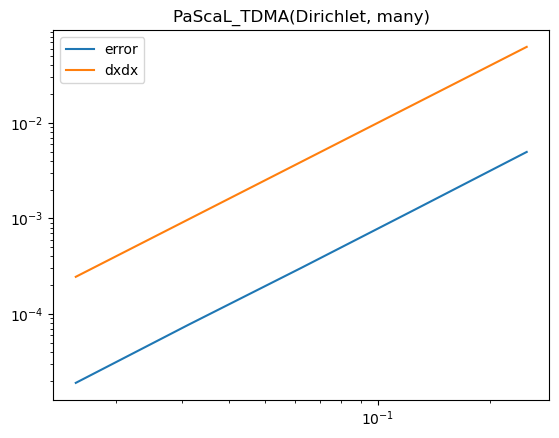

In [2]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.00495957, 0.0012208, 0.000302847, 7.69534e-05, 1.90037e-05])
error_list = np.array([0.00495953, 0.00122072, 0.000302747, 7.68585e-05, 1.8912e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, many)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many Performence

In [2]:
# single
times_64 = np.array([102, 108, 85, 65])
times_128 = np.array([951, 753, 494, 320])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_64 = times_64[0] / times_64
speedup_128 = times_128[0] / times_128

# efficiency 계산
efficiency_64 = speedup_64 / procs
efficiency_128 = speedup_128 / procs

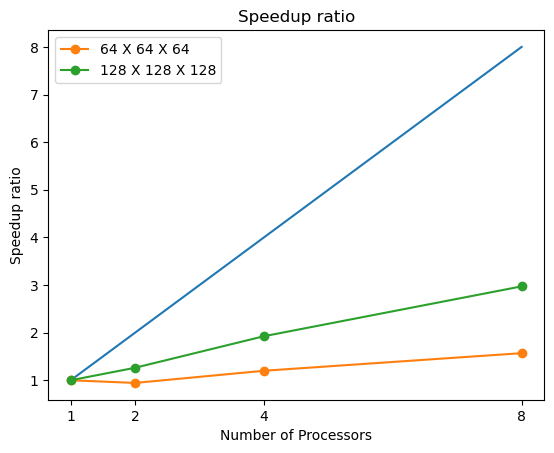

In [3]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_64, "o-", label="64 X 64 X 64")
plt.plot(procs, speedup_128, "o-", label="128 X 128 X 128")
plt.legend()

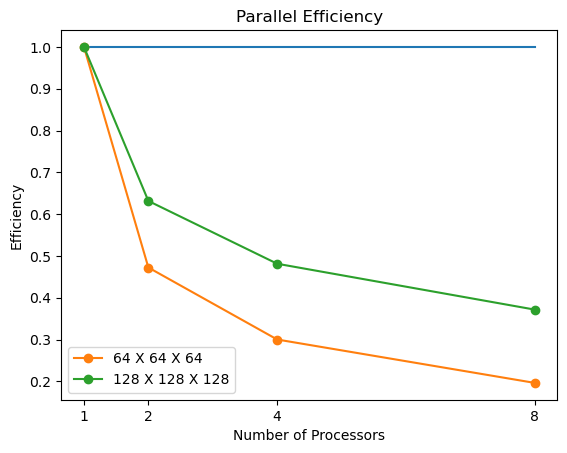

In [4]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

In [8]:
# many (iteration = 10)
times_64 = np.array([91, 55, 33, 22])
times_128 = np.array([931, 555, 285, 148])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_64 = times_64[0] / times_64
speedup_128 = times_128[0] / times_128

# efficiency 계산
efficiency_64 = speedup_64 / procs
efficiency_128 = speedup_128 / procs

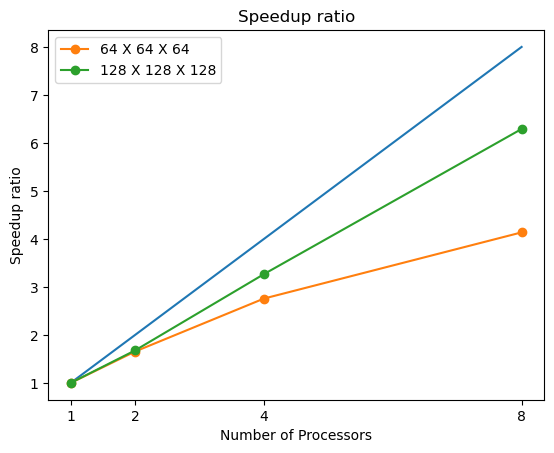

In [9]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_64, "o-", label="64 X 64 X 64")
plt.plot(procs, speedup_128, "o-", label="128 X 128 X 128")
plt.legend()

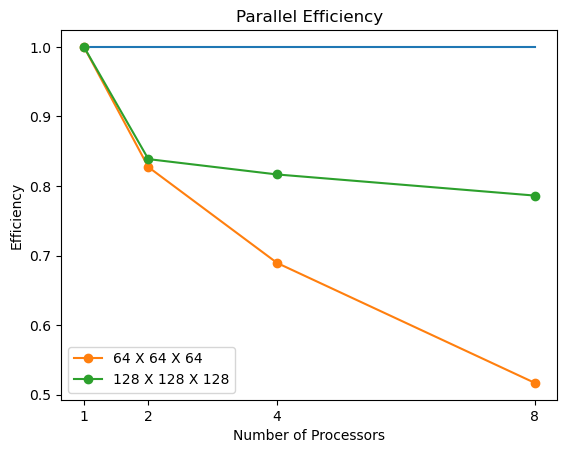

In [10]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

# PaScaL_TDMA (Periodic) single, many validation

In [16]:
x0 = -1
xN = 1
y0 = -1
yN = 1
z0 = -1
zN = 1

nx = ny = nz = 64
npx = 2
npy = 1
npz = 1
mx = nx/npx
my = ny/npy
mz = nz/npz

nx1 = nx+2
ny1 = ny+2
nz1 = nz+2

dx = (xN-x0)/nx
dy = (yN-y0)/ny
dz = (zN-z0)/nz

x = np.zeros(nx+2)
y = np.zeros(ny+2)
z = np.zeros(nz+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
        y[i] = y0
        z[i] = z0
    elif i==nx+1:
        x[i] = xN
        y[i] = yN
        z[i] = zN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
        y[i] = y0 + dy/2 + dy*(i-1)
        z[i] = z0 + dz/2 + dz*(i-1)

In [17]:
folder_name_1 = "../examples_lab/results"
file_name_1 = "theta"

solution = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_k = np.array(pd.read_csv(f"{folder_name_1}/{file_name_1}_k{k}.csv", header=None))
    solution[:, :, k] = solution_k

# folder_name_2 = "../single_processor/results"
# file_name_2 = "theta"
# exact_solution = np.zeros((nx1, ny1, nz1))
# for k in range(0, nz1):
#     solution_single_k = np.array(pd.read_csv(f"{folder_name_2}/{file_name_2}_single_k{k}.csv", header=None))
#     exact_solution[:, :, k] = solution_single_k

t = 0.01
X, Y, Z= np.meshgrid(x, y, z)
exact_solution = np.sin(np.pi * X) * np.sin(np.pi * Y) * np.sin(np.pi * Z) * np.exp(-3*np.pi**2 * t) + np.cos(np.pi * X) * np.cos(np.pi * Y) * np.cos(np.pi*Z)

0.0766788368314159


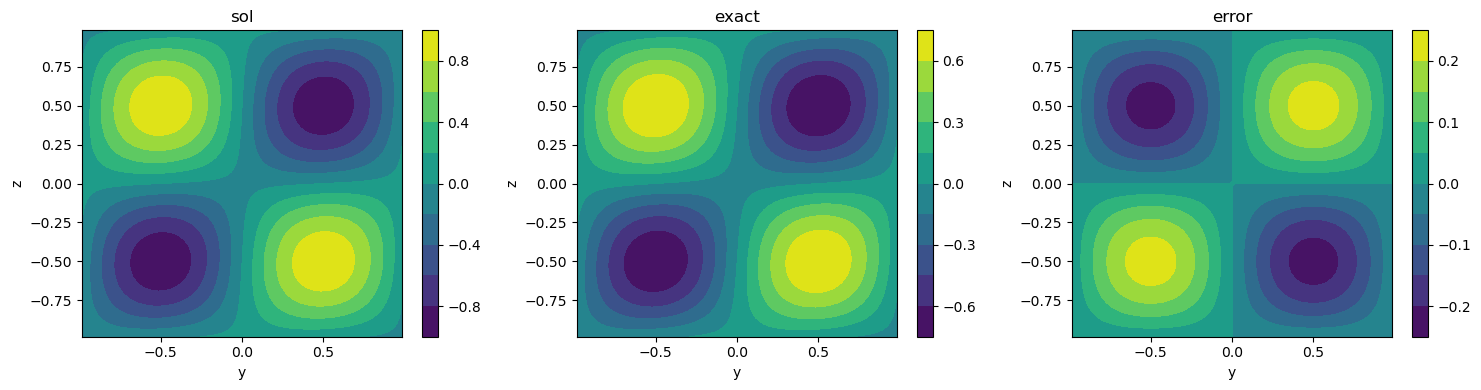

In [18]:
error = exact_solution - solution

# for k in range(1, 9):
#     print(np.sum(error[1:-1, k, 1:-1]**2))

print(np.sqrt(np.sum(error[1:-1, 1:-1, 1:-1]**2) / nx1 / ny1/ nz1))

idx = int(nx1/4)
solution_list = [solution, exact_solution, error]

name_list = ["sol", "exact", "error"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):

    X, Y = np.meshgrid(x[1:-1], y[1:-1])
    # cs = ax.contourf(X, Y, solution_list[i][1:-1, 1:-1, idx], levels=10)
    cs = ax.contourf(X, Y, solution_list[i][1:-1, idx, 1:-1], levels=10)
    # cs = ax.contourf(X, Y, solution_list[i][idx, 1:-1, 1:-1], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')
    ax.set_xlabel("y")
    ax.set_ylabel("z")

plt.tight_layout()
plt.show()

[1.91655499 1.9562598  1.96818693 1.98602372]


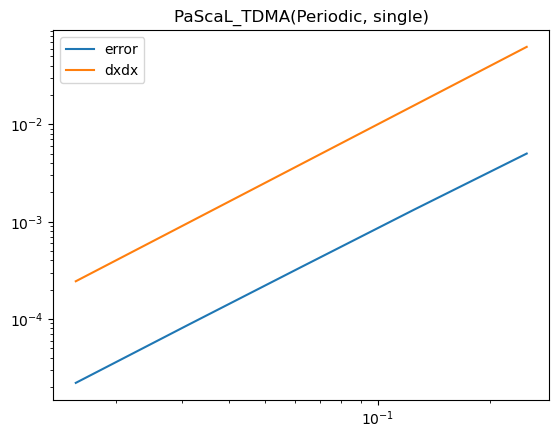

In [23]:
# single (dt = 0.0005)

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.00500864, 0.00132672, 0.00034189, 8.73782e-05, 2.20572e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Periodic, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[1.91657674 1.95622117 1.96836398 1.98677955]


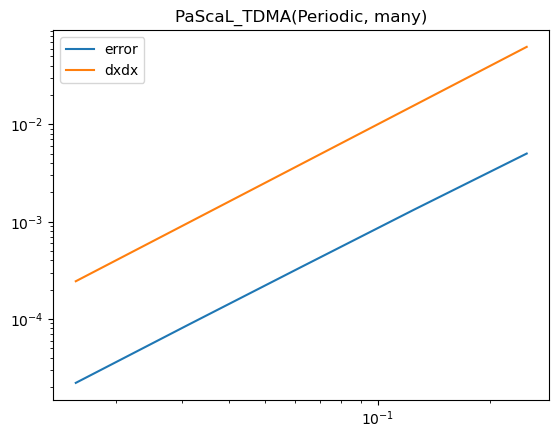

In [25]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.00500864, 0.0013267, 0.000341894, 8.73685e-05, 2.20432e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Periodic, many)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Periodic) single, many Performence

In [6]:
# single
times_64 = np.array([104, 115, 83, 65])
times_128 = np.array([972, 755, 460, 323])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_64 = times_64[0] / times_64
speedup_128 = times_128[0] / times_128

# efficiency 계산
efficiency_64 = speedup_64 / procs
efficiency_128 = speedup_128 / procs

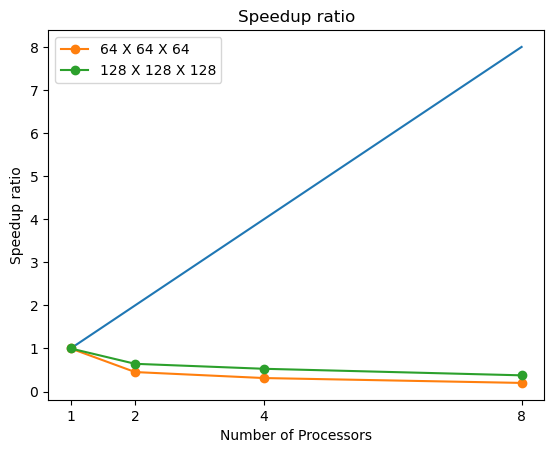

In [7]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

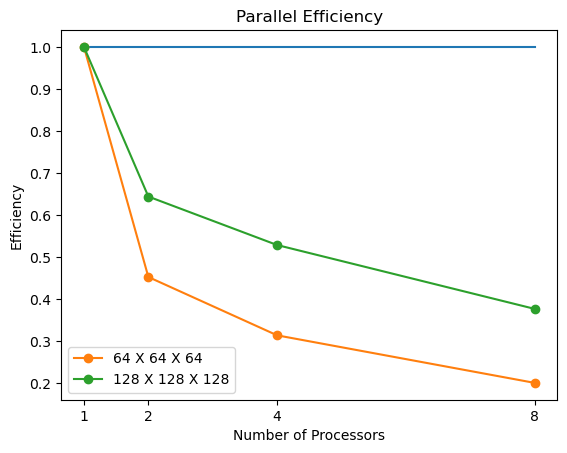

In [8]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

In [ ]:
# many
times_64 = np.array([100, 56])
times_128 = np.array([980])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_64 = times_64[0] / times_64
speedup_128 = times_128[0] / times_128

# efficiency 계산
efficiency_64 = speedup_64 / procs
efficiency_128 = speedup_128 / procs

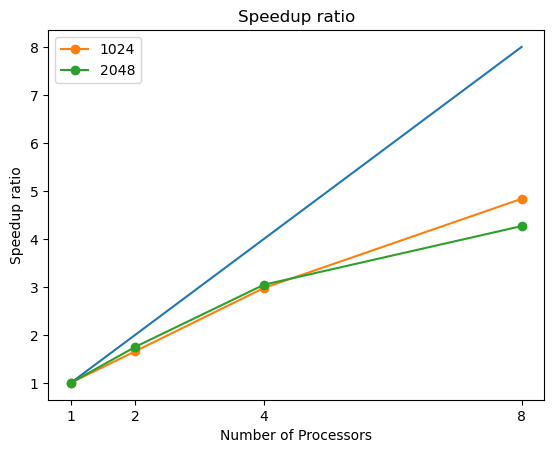

In [ ]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

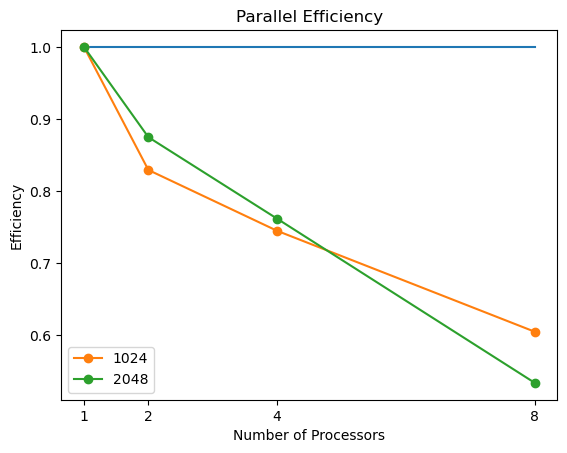

In [ ]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X ")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()